In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from scipy.stats import binned_statistic

ModuleNotFoundError: No module named 'scipy'

In [20]:
def func_exp(x, a):
    return a * np.exp(x)

In [21]:
(soft_Mx, soft_lambda) = np.loadtxt("fig3_soft_data.csv",
                             delimiter = ",", unpack = True)

In [22]:
(stiff_Mx, stiff_lambda) = np.loadtxt("fig3_stiff_data.csv",
                             delimiter = ',', unpack = True)

In [23]:
(apr_Mx, apr_lambda) = np.loadtxt("fig3_APR_data.csv",
                             delimiter = ',', unpack = True)

NameError: name 'interp1d' is not defined

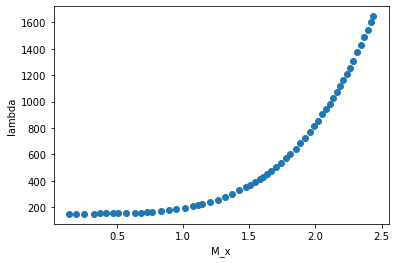

In [24]:
# assign unpacked soft values
x_soft = sorted(np.asarray(soft_Mx))
y_soft = sorted(np.asarray(soft_lambda))
# plot values to check
# labels = plt.subplots()
# labels.set_xlabel(r'$M_x$', fontname = 'Myriad Hebrew', fontsize = 14)
# labels.set_ylabel(r'${\Lambda^{~}}$', fontname = 'Myriad Hebrew', fontsize = 14)
plt.xlabel("M_x")
plt.ylabel("lambda")
plt.plot(x_soft, y_soft, 'o')
# create interp1d function of values then plot
# the function 
soft_lambda_test_interp = interp1d(x_soft, y_soft, bounds_error = False, fill_value = "extrapolate")
plt.plot(np.linspace(x_soft[0], x_soft[-1], 1000), 
         soft_lambda_test_interp(np.linspace(x_soft[0], x_soft[-1], 1000)))

(array([0.44222232, 0.38191928, 0.40202029, 0.46232333, 0.32161623,
        0.26131319, 0.42212131, 0.38191928, 0.56282841, 0.52262638,
        0.34171725, 0.48242435, 0.38191928, 0.30151522, 0.50252536,
        0.48242435, 0.66333348, 0.54272739, 0.34171725, 0.26131319,
        0.26131319, 0.56282841, 0.2814142 , 0.42212131, 0.2814142 ,
        0.38191928, 0.44222232, 0.46232333, 0.2814142 , 0.34171725,
        0.24121217, 0.40202029, 0.34171725, 0.36181826, 0.40202029,
        0.42212131, 0.32161623, 0.60303044, 0.38191928, 0.58292942,
        0.38191928, 0.46232333, 0.42212131, 0.44222232, 0.34171725,
        0.2814142 , 0.26131319, 0.46232333, 0.38191928, 0.42212131]),
 array([1.88944753e-03, 5.16381802e-02, 1.01386913e-01, 1.51135646e-01,
        2.00884378e-01, 2.50633111e-01, 3.00381844e-01, 3.50130576e-01,
        3.99879309e-01, 4.49628042e-01, 4.99376774e-01, 5.49125507e-01,
        5.98874240e-01, 6.48622972e-01, 6.98371705e-01, 7.48120438e-01,
        7.97869171e-01, 8.4761

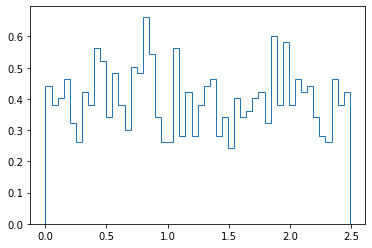

In [25]:
# sample of 1000 values
Mx = np.random.uniform(0, 2.5, 1000)
plt.hist(Mx, bins = 50, density = True, histtype = 'step')

In [26]:
# function for samples
soft_lambda_func = np.zeros(1000)
for i, m in enumerate(Mx):
    soft_lambda_func[i] = soft_lambda_test_interp(m)

NameError: name 'soft_lambda_test_interp' is not defined

In [27]:
# print(soft_lambda_func)

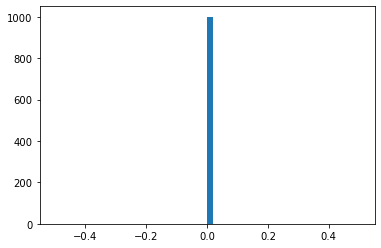

In [6]:
plt.hist(soft_lambda_func, bins = 50)
pdm_lambda, pdm_edge = np.histogram(soft_lambda_func, bins = 50, density = True)

In [7]:
print(len(pdm_edge))
print(len(pdm_lambda))

51
50


In [8]:
pdm_x = [(pdm_edge[i] + pdm_edge[i+1])/2 for i in range(len(pdm_edge)-1)]
print(len(pdm_x))

50


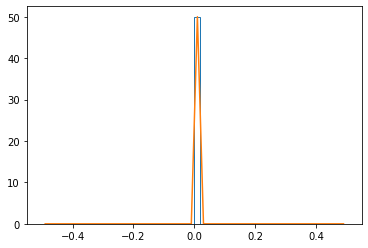

In [9]:
plt.hist(soft_lambda_func, bins = 50, density = True, histtype = 'step')
plt.plot(pdm_x, pdm_lambda)

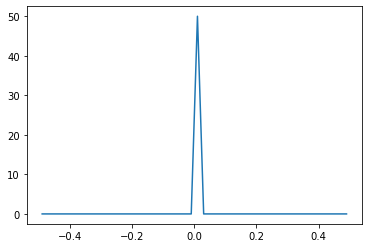

In [10]:
# plt.hist(soft_lambda_func, bins = 50, density = True, histtype = 'step')
plt.plot(pdm_x, pdm_lambda)
# plt.xscale('log')
# plt.yscale('log')

In [11]:
# inverse power law
def inverse_power_law(x, a):
    return x * np.exp(-a)

In [12]:
pdm_lambda_interp = interp1d(pdm_x, pdm_lambda, bounds_error = False, fill_value = "extrapolate")
print(type(pdm_lambda_interp))
plt.plot(np.linspace(pdm_x[0], pdm_x[-1], 1000), 
         pdm_lambda_interp(np.linspace(pdm_x[0], pdm_x[-1], 1000)))
plt.xscale('log')
plt.yscale('log')

NameError: name 'interp1d' is not defined

In [13]:
pdm_lambda_curve_opt, pdm_lambda_curve_cov = curve_fit(inverse_power_law, pdm_x, pdm_lambda)
print(pdm_lambda_curve_opt)
plt.plot(pdm_lambda_curve_opt, pdm_lambda_curve_cov)
plt.plot(np.linspace(pdm_x[0], pdm_x[-1], 1000),
         pdm_lambda_curve_opt(np.linspace(pdm_x[0], pdm_x[-1], 1000)))

NameError: name 'curve_fit' is not defined

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([20.15586117, 20.17586117, 20.19586117, 20.21586117, 20.23586117,
        20.25586117, 20.27586117, 20.29586117, 20.31586117, 20.33586117,
        20.35586117, 20.37586117, 20.39586117, 20.41586117, 20.43586117,
        20.45586117, 20.47586117, 20.49586117, 20.51586117, 20.53586117,
        20.55586117, 20.57586117, 20.59586117, 20.61586117, 20.63586117,
        20.65586117, 20.67586117, 20.69586117, 20.71586117, 20.73586117,
        20.75586117, 20.77586117, 20.79586117, 20.81586117, 20.83586117,
        20.85586117, 20.87586117, 20.89586117, 20.91586117, 20.93586117,
        20.95586117, 20.97586117, 20.99586117, 21.01586117, 21.03586117,
        21.05586117, 21.07586117, 21.09586117, 21.11586117,

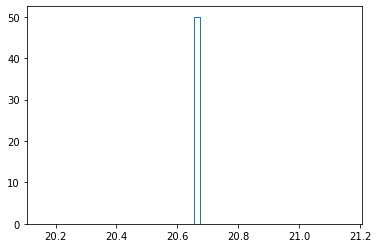

In [114]:
# sample of 1000 values
# print(pdm_x)
# print(pdm_lambda_normal)

plt.hist(pdm_lambda_normal, bins = 50, density = True, histtype = 'step')

In [116]:
# function for samples
# pdm_lambda_sample = np.zeros(1000)
for i, m in enumerate(pdm_lambda_sample):
    pdm_lambda_sample[i] = pdm_lambda_interp(m)

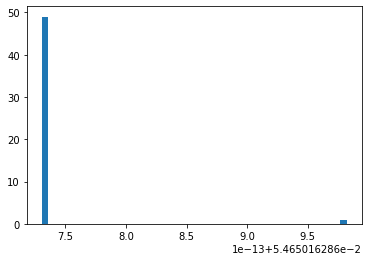

In [117]:
plt.hist(pdm_lambda_sample, bins = 50)
pdm_lambda_x, pdm_edge_sample = np.histogram(pdm_lambda_sample, bins = 50, density = True)